In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
#importando módulos.

In [2]:
df = pd.read_csv('attacks.csv', encoding = 'latin-1')
#importando el csv

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [4]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


## Descripción de información de las columnas
 CaseNumber: Identificador, Date: Fecha del ataque, Year: Año del ataque, Type: tipo de ataque, Country: País del ataque, Area: zona del ataque, Location: locación específica del ataque, Activity: Actividad que realizaba la persona, Name: Nombre de la victima, Sex: género de la victima, injury: descripción de lesión, Fatal: si el ataque fue fatal (y/n), Time: aproximado de la hora, Species: especies del tiburon, Investigatbor or Source: investigador o fuente del reporte, pdf: versión pdf del caso, href formula, link del caso href 2 duplicado del link Case number 1: duplicado de case number case number2: duplicado de case number Original order: identificador ?

In [5]:
df = df.drop(['Case Number.1','Case Number.2','Unnamed: 22','Unnamed: 23',
             'href','href formula','pdf'], axis = 1)
#drop sobre las columnas mencionadas, ya que varias tienen información repetida,
# o de poca utilidad para el análisis.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [12]:
df[6300:6320]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",3.0
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,2.0
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df = df.drop(range(6301,25720), axis = 0)
#drop desde de rengoles desde el 6301 hasta el 25720, la mayoría de los valores
# en este rango en todas las columnas son nulos

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 0 to 25722
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6301 non-null   object 
 2   Year                    6299 non-null   float64
 3   Type                    6297 non-null   object 
 4   Country                 6251 non-null   object 
 5   Area                    5846 non-null   object 
 6   Location                5761 non-null   object 
 7   Activity                5757 non-null   object 
 8   Name                    6091 non-null   object 
 9   Sex                     5736 non-null   object 
 10  Age                     3470 non-null   object 
 11  Injury                  6273 non-null   object 
 12  Fatal (Y/N)             5762 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null  

In [15]:
df_respaldo = df.copy()
#generamos una copia ya que la longitud de este data 
#será con el que trabajemos

In [ ]:
#df = df[['']] pasaremos a reordernar las columnas

In [16]:
columnas = df.columns
columnas
#observamos que Sex Y species están mal escritas, tienen espacios.

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'original order'],
      dtype='object')

In [29]:
columns = [i.replace(' ','',1) for i in columnas]
columns 
# renombramos las columnas para quitar espacios y pasar a minusculas

['CaseNumber',
 'Date',
 'Year',
 'Type',
 'Country',
 'Area',
 'Location',
 'Activity',
 'Name',
 'Sex',
 'Age',
 'Injury',
 'Fatal(Y/N)',
 'Time',
 'Species',
 'Investigatoror Source',
 'originalorder']

In [30]:
df.columns = columns
#asignamos

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 0 to 25722
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CaseNumber             6301 non-null   object 
 1   Date                   6301 non-null   object 
 2   Year                   6299 non-null   float64
 3   Type                   6297 non-null   object 
 4   Country                6251 non-null   object 
 5   Area                   5846 non-null   object 
 6   Location               5761 non-null   object 
 7   Activity               5757 non-null   object 
 8   Name                   6091 non-null   object 
 9   Sex                    5736 non-null   object 
 10  Age                    3470 non-null   object 
 11  Injury                 6273 non-null   object 
 12  Fatal(Y/N)             5762 non-null   object 
 13  Time                   2948 non-null   object 
 14  Species                3464 non-null   object 
 15  Inv

## Extrayendo valores de las columnas.

In [34]:
df['Fatal(Y/N)'].value_counts() 
#revisamos con que valores contamos

N          4293
Y          1387
UNKNOWN      71
 N            7
y             1
2017          1
N             1
M             1
Name: Fatal(Y/N), dtype: int64

In [36]:
dic = {' N': 'N','N ':'N', 'y':'Y', '2017':'UNKNOWN', 'N ':'N', 'M':'N'}
df['Fatal(Y/N)'] = df['Fatal(Y/N)'].replace(dic)
#reasignamos valores para quedarnos con tres categrías sobre fatal

In [37]:
df['Fatal(Y/N)'].value_counts() 

N          4302
Y          1388
UNKNOWN      72
Name: Fatal(Y/N), dtype: int64

In [39]:
df['Species'].value_counts()
#revisando la columna species

White shark                                           163
Shark involvement prior to death was not confirmed    105
Invalid                                               102
Shark involvement not confirmed                        88
Tiger shark                                            73
                                                     ... 
Tiger shark, 4 m [13'] female                           1
Bull shark, 2.5 m                                       1
5 m to 6 m white shark                                  1
White shark, 10 '                                       1
2.27 m shark                                            1
Name: Species, Length: 1549, dtype: int64

In [40]:
pats = [r'.*?\bwhite\b\s+\bshark\b.*',r'.*?\bblue\b\s+\bshark\b.*', r'.*?\btiger\b\s.*',
           r'.*?\bbull\b\s.*',r'.*?\bshark\b\s+\binvolvement\b.*',r'.*?\bwobbegong\b\s+\bshark\b.*',
           r'.*?\bblacktip\b\s.*', r'.*?\bbronze\b\s+\bwhaler\b.*', r'.*?\bmako\b\s.*',r'.*?\bnurse\b\s.*',
           r'.*?\bhammerhead\b\s.*', r'.*?\braggedtooth\b\s.*']

sharks = ['White shark', 'Blue shark', 'Tiger shark', 
         'Bull shark', 'Unidentified shark', 'Wobbegong shark',
         'Blacktip shark','Bronze whaler shark', 'Mako shark', 
         'Nurse shark', 'Hammerhead shark', 'Raggedtooth shark']

In [42]:
df['Species'] = df['Species'].str.lower().replace(pats,sharks, regex=True)

In [47]:
df['Species'].value_counts()

White shark            630
Unidentified shark     330
Tiger shark            264
Bull shark             177
invalid                102
                      ... 
13'10" shark             1
234-lb shark             1
porbeagle shark, 7'      1
sandtiger shark, 8'      1
3m shark                 1
Name: Species, Length: 674, dtype: int64

In [51]:
df.head()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,Investigatoror Source,originalorder
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,Tiger shark,A .Kipper,6299.0


In [63]:
df['CaseNumber'][6150:6180]

6150    1753.10.27.R
6151      1751.07.27
6152      1749.00.00
6153      1755.00.00
6154      1748.00.00
6155      1742.12.17
6156    1738.04.06.R
6157      1733.00.00
6158      1723.00.00
6159      1721.06.00
6160      1703.03.26
6161    1700.00.00.c
6162    1700.00.00.b
6163    1700.00.00.a
6164    1642.00.00.b
6165    1638.00.00.R
6166    1637.00.00.R
6167    1617.00.00.R
6168      1642.00.00
6169      1595.00.00
6170    1580.01.10.R
6171      1555.00.00
6172      1554.00.00
6173      1543.00.00
6174      0500.00.00
6175      0077.00.00
6176      0005.00.00
6177       0000.0214
6178       0000.0336
6179       0000.0493
Name: CaseNumber, dtype: object

In [65]:
import datetime #'%b %d, %Y'

In [76]:
df['Date'] = df['Date'].astype(str)

In [86]:
df['Month'] = df['Date'].apply(lambda x: re.findall(r'\-[A-Za-z]{3}\-',x))

0        [-Jun-]
1        [-Jun-]
2        [-Jun-]
3        [-Jun-]
4        [-Jun-]
          ...   
6299          []
6300          []
25720         []
25721         []
25722         []
Name: Date, Length: 6304, dtype: object

In [84]:
df['Month'] = df['Month'].apply(lambda x:''.join(x).lower())

In [92]:
df['Month'] = df['Month'].apply(lambda x: re.sub('-','',x))
# ya contamos con month, se procede a limpiar year para contar con una fecha 

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 0 to 25722
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CaseNumber             6301 non-null   object 
 1   Date                   6304 non-null   object 
 2   Year                   6299 non-null   float64
 3   Type                   6297 non-null   object 
 4   Country                6251 non-null   object 
 5   Area                   5846 non-null   object 
 6   Location               5761 non-null   object 
 7   Activity               5757 non-null   object 
 8   Name                   6091 non-null   object 
 9   Sex                    5736 non-null   object 
 10  Age                    3470 non-null   object 
 11  Injury                 6273 non-null   object 
 12  Fatal(Y/N)             5762 non-null   object 
 13  Time                   2948 non-null   object 
 14  Species                3464 non-null   object 
 15  Inv

In [93]:
df['Year'].value_counts()

2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
         ... 
1801.0      1
1638.0      1
1834.0      1
1723.0      1
1786.0      1
Name: Year, Length: 249, dtype: int64

In [102]:
df['Year'] = df['Year'].fillna(0)
df['Year'] = df['Year'].astype(str)

In [103]:
df['Date2'] = df['Year'] +'-'+ df['Month']

In [104]:
df['Date2'].head()
#trabajaremos con esta fecha 

0    2018-jun
1    2018-jun
2    2018-jun
3    2018-jun
4    2018-jun
Name: Date2, dtype: object

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 0 to 25722
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CaseNumber             6301 non-null   object 
 1   Date                   6304 non-null   object 
 2   Year                   6304 non-null   object 
 3   Type                   6297 non-null   object 
 4   Country                6251 non-null   object 
 5   Area                   5846 non-null   object 
 6   Location               5761 non-null   object 
 7   Activity               5757 non-null   object 
 8   Name                   6091 non-null   object 
 9   Sex                    5736 non-null   object 
 10  Age                    3470 non-null   object 
 11  Injury                 6273 non-null   object 
 12  Fatal(Y/N)             5762 non-null   object 
 13  Time                   2948 non-null   object 
 14  Species                3464 non-null   object 
 15  Inv

In [106]:
#trabajremos con la columna time
df['Time'].value_counts()

Afternoon                               187
11h00                                   128
Morning                                 121
12h00                                   109
15h00                                   108
                                       ... 
09h30                                     1
11h06                                     1
Possibly same incident as 2000.08.21      1
14h30 / 15h30                             1
11h48                                     1
Name: Time, Length: 366, dtype: int64

In [108]:
df['Time2'] = df['Time'].fillna('Unknow')
df['Time2'] = df['Time'].astype('str')
df['Time2'] = df['Time'].str.extract('([0-9]+)', expand=False)


In [109]:
df['Time2'].value_counts()


11      259
16      240
15      238
14      237
12      204
13      200
17      199
10      181
18      131
09      123
08       92
07       83
19       53
06       39
20       30
05       11
03       10
23        8
02        7
01        6
04        6
22        5
21        5
2         2
1600      2
2000      1
00        1
1300      1
30        1
9         1
8         1
0500      1
0830      1
1500      1
Name: Time2, dtype: int64

In [110]:
df['Time2'].isna().value_counts()

True     3924
False    2380
Name: Time2, dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 0 to 25722
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CaseNumber             6301 non-null   object 
 1   Date                   6304 non-null   object 
 2   Year                   6304 non-null   object 
 3   Type                   6297 non-null   object 
 4   Country                6251 non-null   object 
 5   Area                   5846 non-null   object 
 6   Location               5761 non-null   object 
 7   Activity               5757 non-null   object 
 8   Name                   6091 non-null   object 
 9   Sex                    5736 non-null   object 
 10  Age                    3470 non-null   object 
 11  Injury                 6273 non-null   object 
 12  Fatal(Y/N)             5762 non-null   object 
 13  Time                   2948 non-null   object 
 14  Species                3464 non-null   object 
 15  Inv

In [113]:
df.head()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N),Time,Species,Investigatoror Source,originalorder,Month,Date2,Time2
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6303.0,jun,2018-jun,18
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",6302.0,jun,2018-jun,14
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301.0,jun,2018-jun,07
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300.0,jun,2018-jun,NaN
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,Tiger shark,A .Kipper,6299.0,jun,2018-jun,NaN


In [112]:
#checkpoint
df3 = df.copy()

2015    143
2017    136
2016    130
0       129
2011    128
       ... 
1792      1
1859      1
1857      1
1788      1
1703      1
Name: Year, Length: 249, dtype: int64

In [ ]:
#elimino columnas date,time,Casenumber,year,month

In [117]:
df.drop(['CaseNumber','Date','Time'], axis = 1, inplace = True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 0 to 25722
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   6304 non-null   object 
 1   Type                   6297 non-null   object 
 2   Country                6251 non-null   object 
 3   Area                   5846 non-null   object 
 4   Location               5761 non-null   object 
 5   Activity               5757 non-null   object 
 6   Name                   6091 non-null   object 
 7   Sex                    5736 non-null   object 
 8   Age                    3470 non-null   object 
 9   Injury                 6273 non-null   object 
 10  Fatal(Y/N)             5762 non-null   object 
 11  Species                3464 non-null   object 
 12  Investigatoror Source  6284 non-null   object 
 13  originalorder          6301 non-null   float64
 14  Month                  6304 non-null   object 
 15  Dat

In [119]:
##empezamos a trabjar con activity
df['Activity'].value_counts()

Surfing                                                                                                               971
Swimming                                                                                                              868
Fishing                                                                                                               431
Spearfishing                                                                                                          333
Bathing                                                                                                               162
                                                                                                                     ... 
Ship lay at anchor & man was working on its rudder                                                                      1
Diving for trochus from lugger                                                                                          1
The 6015-ton British shi

In [123]:
patron2 = [r'\bsurfing\b', r'\bswimming\b', 
           r'\bfishing\b', r'\bspearfishing\b',r'\bbathing\b']
cat2 = ['surfing', 'swimming', 'fishing', 'spearfishing', 'bathing']           

In [126]:
df['Activity2'] = df['Activity'].str.lower().replace(patron2,cat2, regex=True)

In [125]:
df['Species2'].head()#error por darle copy paste a mi note, lo dropeo alrato

0    white shark
1            NaN
2            NaN
3      2 m shark
4    tiger shark
Name: Species2, dtype: object

In [127]:
df['Activity'].value_counts()

Surfing                                                                                                               971
Swimming                                                                                                              868
Fishing                                                                                                               431
Spearfishing                                                                                                          333
Bathing                                                                                                               162
                                                                                                                     ... 
Ship lay at anchor & man was working on its rudder                                                                      1
Diving for trochus from lugger                                                                                          1
The 6015-ton British shi

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 0 to 25722
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   6304 non-null   object 
 1   Type                   6297 non-null   object 
 2   Country                6251 non-null   object 
 3   Area                   5846 non-null   object 
 4   Location               5761 non-null   object 
 5   Activity               5757 non-null   object 
 6   Name                   6091 non-null   object 
 7   Sex                    5736 non-null   object 
 8   Age                    3470 non-null   object 
 9   Injury                 6273 non-null   object 
 10  Fatal(Y/N)             5762 non-null   object 
 11  Species                3464 non-null   object 
 12  Investigatoror Source  6284 non-null   object 
 13  originalorder          6301 non-null   float64
 14  Month                  6304 non-null   object 
 15  Dat

In [129]:
#trabajamos con type
df['Type'].value_counts()

Unprovoked      4594
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [155]:
dic = {'Invalid': 'Unknow', 'Sea Disaster':'Unknow', 'Boating':'Unknow',
      'Boat': 'Unknow','Questionable': 'Unknow','Boatomg':'Unknow'}

In [156]:
df['Type'] = df['Type'].replace(dic)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 0 to 25722
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   6304 non-null   object 
 1   Type                   6297 non-null   object 
 2   Country                6251 non-null   object 
 3   Area                   5846 non-null   object 
 4   Location               5761 non-null   object 
 5   Activity               5757 non-null   object 
 6   Name                   6091 non-null   object 
 7   Sex                    5736 non-null   object 
 8   Age                    3470 non-null   object 
 9   Injury                 6273 non-null   object 
 10  Fatal(Y/N)             5762 non-null   object 
 11  Species                3464 non-null   object 
 12  Investigatoror Source  6284 non-null   object 
 13  originalorder          6301 non-null   float64
 14  Month                  6304 non-null   object 
 15  Dat

In [141]:
df['Activity2'].value_counts()

surfing                                                                   971
swimming                                                                  868
fishing                                                                   431
spearfishing                                                              333
bathing                                                                   162
                                                                         ... 
retrieving bait box that had fallen overboard                               1
anti-sabotage night dive exercise alongside destroyer (scuba diving)        1
free diving / spearfishing, from paddleboard & floating on the surface      1
american schooner orator capsized                                           1
italian liner principessa mafalda sank                                      1
Name: Activity2, Length: 1504, dtype: int64

In [142]:
df['Species2'].value_counts()

white shark                                                                                                                          630
unidentified shark                                                                                                                   331
tiger shark                                                                                                                          264
bull shark                                                                                                                           177
invalid                                                                                                                              102
                                                                                                                                    ... 
sandtiger shark, 4' to 5'                                                                                                              1
650-lb shark                             

In [146]:
df.drop(['Species2','Activity'], axis = 1, inplace = True)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 0 to 25722
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   6304 non-null   object 
 1   Type                   6297 non-null   object 
 2   Country                6251 non-null   object 
 3   Area                   5846 non-null   object 
 4   Location               5761 non-null   object 
 5   Name                   6091 non-null   object 
 6   Sex                    5736 non-null   object 
 7   Age                    3470 non-null   object 
 8   Injury                 6273 non-null   object 
 9   Fatal(Y/N)             5762 non-null   object 
 10  Species                3464 non-null   object 
 11  Investigatoror Source  6284 non-null   object 
 12  originalorder          6301 non-null   float64
 13  Month                  6304 non-null   object 
 14  Date2                  6304 non-null   object 
 15  Tim

In [158]:
df4 = df.copy() #checkpoint

In [159]:
df = df[['originalorder','Date2','Year','Month','Time2',
          'Country','Area','Location','Name', 'Age',
         'Sex','Activity2','Injury','Fatal(Y/N)','Type','Species','Type',
         'Investigatoror Source']]

In [160]:
df.head()

,originalorder,Date2,Year,Month,Time2,Country,Area,Location,Name,Age,Sex,Activity2,Injury,Fatal(Y/N),Type,Species,Type,Investigatoror Source
0,6303.0,2018-jun,2018,jun,18,USA,California,"Oceanside, San Diego County",Julie Wolfe,57,F,paddling,"No injury to occupant, outrigger canoe and pad...",N,Unknow,White shark,Unknow,"R. Collier, GSAF"
1,6302.0,2018-jun,2018,jun,14,USA,Georgia,"St. Simon Island, Glynn County",Adyson McNeely,11,F,standing,Minor injury to left thigh,N,Unprovoked,NaN,Unprovoked,"K.McMurray, TrackingSharks.com"
2,6301.0,2018-jun,2018,jun,07,USA,Hawaii,"Habush, Oahu",John Denges,48,M,surfing,Injury to left lower leg from surfboard skeg,N,Unknow,NaN,Unknow,"K.McMurray, TrackingSharks.com"
3,6300.0,2018-jun,2018,jun,NaN,AUSTRALIA,New South Wales,Arrawarra Headland,male,NaN,M,surfing,Minor injury to lower leg,N,Unprovoked,2 m shark,Unprovoked,"B. Myatt, GSAF"
4,6299.0,2018-jun,2018,jun,NaN,MEXICO,Colima,La Ticla,Gustavo Ramos,NaN,M,free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Provoked,Tiger shark,Provoked,A .Kipper


In [162]:
df.drop(['Type'], axis = 1, inplace = True)

In [164]:
df['Type'] = df4['Type']

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 0 to 25722
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   originalorder          6301 non-null   float64
 1   Date2                  6304 non-null   object 
 2   Year                   6304 non-null   object 
 3   Month                  6304 non-null   object 
 4   Time2                  2380 non-null   object 
 5   Country                6251 non-null   object 
 6   Area                   5846 non-null   object 
 7   Location               5761 non-null   object 
 8   Name                   6091 non-null   object 
 9   Age                    3470 non-null   object 
 10  Sex                    5736 non-null   object 
 11  Activity2              5757 non-null   object 
 12  Injury                 6273 non-null   object 
 13  Fatal(Y/N)             5762 non-null   object 
 14  Species                3464 non-null   object 
 15  Inv

In [169]:
#trabajando con injury
df['Injury'].head(50)

0     No injury to occupant, outrigger canoe and pad...
1                            Minor injury to left thigh
2          Injury to left lower leg from surfboard skeg
3                             Minor injury to lower leg
4     Lacerations to leg & hand shark PROVOKED INCIDENT
5                               No injury, board bitten
6                                                 FATAL
7               Minor injury to foot. PROVOKED INCIDENT
8                                 Lower left leg bitten
9                                  Minor injury to foot
10    Minor bite to hand by captive shark. PROVOKED ...
11                 Injuries to lower right leg and foot
12                         Severe bite to right forearm
13    Injured by teeth of a dead porbeagle shark he ...
14      Shallow lacerations to finger PROVOKED INCIDENT
15                         Minor injury, marks on board
16                         No injury, surfboard damaged
17                                Minor injury t

In [168]:
df['Injury'].value_counts()

FATAL                                                           802
Survived                                                         97
Foot bitten                                                      87
No injury                                                        82
Leg bitten                                                       72
                                                               ... 
Lacerations and puncture wounds to leg and foot                   1
Lacerations to right  hand by hooked shark PROVOKED INCIDENT      1
No injury to occupant, canoe bitten                               1
Feet grabbed                                                      1
Remains recovered 1-4-1984 showed evidence of defense wounds      1
Name: Injury, Length: 3736, dtype: int64

In [173]:
df['Injury'] = df['Injury'].astype(str)

In [174]:
df['Injury'].apply(lambda x: x.lower())

0        no injury to occupant, outrigger canoe and pad...
1                               minor injury to left thigh
2             injury to left lower leg from surfboard skeg
3                                minor injury to lower leg
4        lacerations to leg & hand shark provoked incident
                               ...                        
6299                                                 fatal
6300                                                 fatal
25720                                                  nan
25721                                                  nan
25722                                                  nan
Name: Injury, Length: 6304, dtype: object

In [175]:
pats = [r'.*?\bno\b\s+\binjury\b.*',r'.*?\bminor\b\s+\binjury\b.*',
       r'.*?\blacerations\b.*', r'.*?\binjuries\b.*']
categories = ['no injury', 'minor injury', 'injury', 'injuries']

In [181]:
df['Injury2'] = df['Injury'].str.lower().replace(pats,categories, regex=True)

In [186]:
df['Injury2'].unique()

array(['no injury', 'minor injury',
       'injury to left lower leg from surfboard skeg', ...,
       "fatal, body not recovered but shark was caught with the man's loincloth in its gut shortly afterwards.",
       'fatal, leg stripped of flesh  ',
       'fatal, knocked overboard by tail of shark & carried off by shark '],
      dtype=object)

In [184]:
df['Injury2'].value_counts()

2571

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 0 to 25722
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   originalorder          6301 non-null   float64
 1   Date2                  6304 non-null   object 
 2   Year                   6304 non-null   object 
 3   Month                  6304 non-null   object 
 4   Time2                  2380 non-null   object 
 5   Country                6251 non-null   object 
 6   Area                   5846 non-null   object 
 7   Location               5761 non-null   object 
 8   Name                   6091 non-null   object 
 9   Age                    3470 non-null   object 
 10  Sex                    5736 non-null   object 
 11  Activity2              5757 non-null   object 
 12  Injury                 6304 non-null   object 
 13  Fatal(Y/N)             5762 non-null   object 
 14  Species                3464 non-null   object 
 15  Inv

In [188]:
df5 = df.copy()#checkpoint

In [ ]:
#eliminamos columna injury dejamos un respaldo

In [193]:
df.drop(['Investigatoror Source'], axis = 1, inplace = True)

In [194]:
df.columns = ['Original Order', 'Date', 'Year', 'Month', 'Time', 
             'Country', 'Area', 'Location', 'Name', 'Age', 'Sex', 
              'Activity', 'Fatal', 'Species', 'Type', 'Injury']

In [195]:
df.head()

,Original Order,Date,Year,Month,Time,Country,Area,Location,Name,Age,Sex,Activity,Fatal,Species,Type,Injury
0,6303.0,2018-jun,2018,jun,18,USA,California,"Oceanside, San Diego County",Julie Wolfe,57,F,paddling,N,White shark,Unknow,no injury
1,6302.0,2018-jun,2018,jun,14,USA,Georgia,"St. Simon Island, Glynn County",Adyson McNeely,11,F,standing,N,NaN,Unprovoked,minor injury
2,6301.0,2018-jun,2018,jun,07,USA,Hawaii,"Habush, Oahu",John Denges,48,M,surfing,N,NaN,Unknow,injury to left lower leg from surfboard skeg
3,6300.0,2018-jun,2018,jun,NaN,AUSTRALIA,New South Wales,Arrawarra Headland,male,NaN,M,surfing,N,2 m shark,Unprovoked,minor injury
4,6299.0,2018-jun,2018,jun,NaN,MEXICO,Colima,La Ticla,Gustavo Ramos,NaN,M,free diving,N,Tiger shark,Provoked,injury


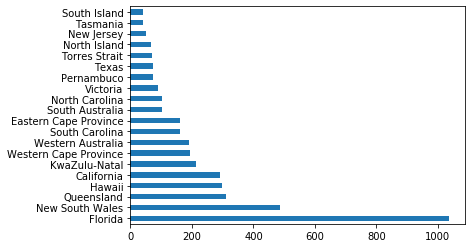

In [216]:
area = df['Area'].value_counts() #trabajamos con area
area[0:20].plot.barh()
plt.show()
#grafica de area

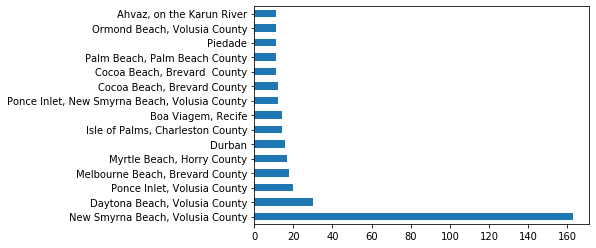

In [218]:
loc = df['Location'].value_counts()
loc[0:15].plot.barh()
plt.show()
#reparar cadena de strings

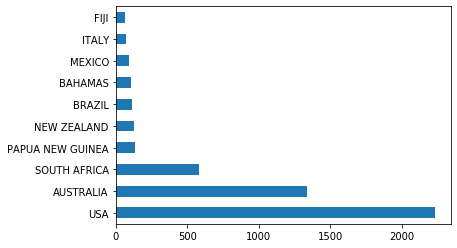

In [220]:
country = df['Country'].value_counts()
country[0:10].plot.barh()
plt.show()

In [224]:
df.isna().sum()

Original Order       3
Date                 0
Year                 0
Month                0
Time              3924
Country             53
Area               458
Location           543
Name               213
Age               2834
Sex                568
Activity           547
Fatal              542
Species           2840
Type                 7
Injury               0
dtype: int64

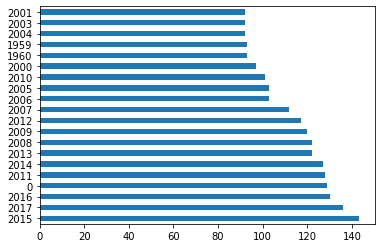

In [225]:
year = df['Year'].value_counts()
year[0:20].plot.barh()
plt.show()
#el valor cero es desconocido

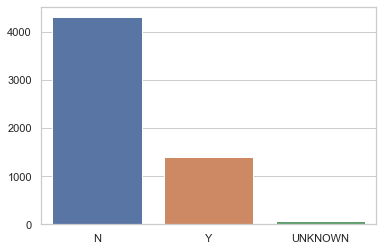

In [228]:
fatal = df['Fatal'].value_counts()
sns.set(style = 'whitegrid')
ax = sns.barplot(fatal.index, fatal.values)

In [233]:
df['Age'].value_counts()

17                154
18                150
19                142
20                141
16                138
                 ... 
21, 34,24 & 35      1
2 to 3 months       1
>50                 1
                    1
9 months            1
Name: Age, Length: 157, dtype: int64

In [239]:
age = df['Age'].value_counts()
age.mean() 

22.101910828025478

In [244]:
age = pd.Series(np.where(age>80, np.nan, age))

In [246]:
age.value_counts()

1.0     75
2.0      8
7.0      4
3.0      4
38.0     3
28.0     3
5.0      3
80.0     2
16.0     2
4.0      2
43.0     2
69.0     2
56.0     2
13.0     2
78.0     2
10.0     2
9.0      2
35.0     2
73.0     1
76.0     1
37.0     1
52.0     1
50.0     1
48.0     1
44.0     1
42.0     1
6.0      1
33.0     1
8.0      1
30.0     1
29.0     1
27.0     1
23.0     1
22.0     1
20.0     1
17.0     1
15.0     1
14.0     1
11.0     1
32.0     1
dtype: int64

In [249]:
age = pd.Series(np.where(age == 1,np.nan, age))

In [250]:
age.value_counts()

2.0     8
7.0     4
3.0     4
38.0    3
28.0    3
5.0     3
80.0    2
16.0    2
4.0     2
43.0    2
69.0    2
56.0    2
13.0    2
78.0    2
10.0    2
9.0     2
35.0    2
73.0    1
76.0    1
37.0    1
52.0    1
50.0    1
48.0    1
44.0    1
42.0    1
6.0     1
33.0    1
8.0     1
30.0    1
29.0    1
27.0    1
23.0    1
22.0    1
20.0    1
17.0    1
15.0    1
14.0    1
11.0    1
32.0    1
dtype: int64

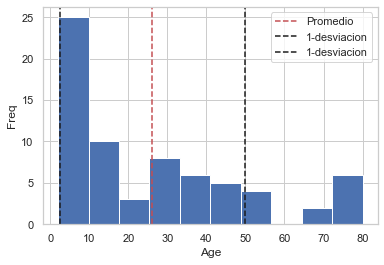

In [254]:
fig, ax = plt.subplots()
ax.hist(age, bins = 10)
ax.set_xlabel('Age')
ax.set_ylabel('Freq')
plt.axvline(age.mean(), c = 'r', linestyle = '--', label = 'Promedio')
plt.axvline(age.mean() + np.std(age), c = 'k', linestyle = '--', label = '1-desviacion')
plt.axvline(age.mean() - np.std(age), c = 'k', linestyle = '--', label = '1-desviacion')
ax.legend()

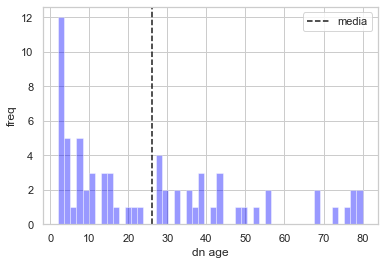

In [255]:
ax = sns.distplot(age, bins = 50, kde = False, color = 'blue')
ax.set(xlabel = 'dn age', ylabel = 'freq')
ax.axvline(x = age.mean(), c = 'k', linestyle = '--', label = 'media')
ax.legend()

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 0 to 25722
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Original Order  6301 non-null   float64
 1   Date            6304 non-null   object 
 2   Year            6304 non-null   object 
 3   Month           6304 non-null   object 
 4   Time            2380 non-null   object 
 5   Country         6251 non-null   object 
 6   Area            5846 non-null   object 
 7   Location        5761 non-null   object 
 8   Name            6091 non-null   object 
 9   Age             3470 non-null   object 
 10  Sex             5736 non-null   object 
 11  Activity        5757 non-null   object 
 12  Fatal           5762 non-null   object 
 13  Species         3464 non-null   object 
 14  Type            6297 non-null   object 
 15  Injury          6304 non-null   object 
dtypes: float64(1), object(15)
memory usage: 837.2+ KB


In [267]:
month = df['Month'].value_counts() 

month

          912
jul       621
aug       555
sep       520
jan       493
jun       475
apr       420
oct       417
dec       415
mar       379
nov       377
may       358
feb       356
marmar      2
augaug      1
sepsep      1
janjan      1
novnov      1
Name: Month, dtype: int64

In [266]:
df['Month'].value_counts()

          912
jul       621
aug       555
sep       520
jan       493
jun       475
apr       420
oct       417
dec       415
mar       379
nov       377
may       358
feb       356
marmar      2
augaug      1
sepsep      1
janjan      1
novnov      1
Name: Month, dtype: int64

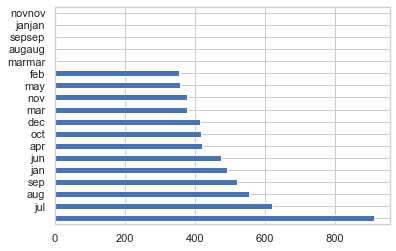

In [270]:

month.plot.barh()
plt.show()
#limpiar valores erroneos en month

In [277]:
df = df.reset_index()

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6304 entries, 0 to 6303
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6304 non-null   int64  
 1   Original Order  6301 non-null   float64
 2   Date            6304 non-null   object 
 3   Year            6304 non-null   int64  
 4   Month           6304 non-null   object 
 5   Time            2380 non-null   object 
 6   Country         6251 non-null   object 
 7   Area            5846 non-null   object 
 8   Location        5761 non-null   object 
 9   Name            6091 non-null   object 
 10  Age             3470 non-null   object 
 11  Sex             5736 non-null   object 
 12  Activity        5757 non-null   object 
 13  Fatal           5762 non-null   object 
 14  Species         3464 non-null   object 
 15  Type            6297 non-null   object 
 16  Injury          6304 non-null   object 
dtypes: float64(1), int64(2), object(1

In [281]:
df['Year'] = df['Year'].astype(int)

In [294]:
df['Year'][df['Year']<1543] = df['Year'][df['Year']<1543].apply(lambda x: 1543)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [297]:
df['Year'].value_counts()

2015    143
2017    136
1543    133
2016    130
2011    128
       ... 
1758      1
1786      1
1802      1
1810      1
1580      1
Name: Year, Length: 245, dtype: int64

In [356]:
df['Time2'] = pd.Series(np.where(df['Time'] == 'nan', 14,df['Time']))

In [357]:
df['Time2'].value_counts()

14      3924
11       259
16       240
15       238
14       237
12       204
13       200
17       199
10       181
18       131
09       123
08        92
07        83
19        53
06        39
20        30
05        11
03        10
23         8
02         7
01         6
04         6
22         5
21         5
1600       2
2          2
1500       1
9          1
8          1
1300       1
2000       1
30         1
0830       1
0500       1
00         1
Name: Time2, dtype: int64

In [358]:
df['Time2'] = df['Time2'].astype(int)

In [359]:
df['Time2'][df['Time2']>25] = df['Time2'][df['Time2']>25].apply(lambda x: 14)
#llenamos con el promedio de los valores mas repetidos

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [360]:
df['Time2'].value_counts()

14    4169
11     259
16     240
15     238
12     204
13     200
17     199
10     181
18     131
9      124
8       93
7       83
19      53
6       39
20      30
5       11
3       10
2        9
23       8
4        6
1        6
21       5
22       5
0        1
Name: Time2, dtype: int64

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6304 entries, 0 to 6303
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6304 non-null   int64  
 1   Original Order  6301 non-null   float64
 2   Date            6304 non-null   object 
 3   Year            6304 non-null   int64  
 4   Month           6304 non-null   object 
 5   Time            6304 non-null   object 
 6   Country         6251 non-null   object 
 7   Area            5846 non-null   object 
 8   Location        5761 non-null   object 
 9   Name            6091 non-null   object 
 10  Age             3470 non-null   object 
 11  Sex             5736 non-null   object 
 12  Activity        5757 non-null   object 
 13  Fatal           5762 non-null   object 
 14  Species         3464 non-null   object 
 15  Type            6297 non-null   object 
 16  Injury          6304 non-null   object 
 17  Time2           6304 non-null   i

In [365]:
df['Time2'] = df['Time2'].apply(lambda x: datetime.time(x))

In [366]:
df['Time'] = df['Time2']
df.drop(['Time2'], axis = 1, inplace = True)

In [367]:
df.head()

,index,Original Order,Date,Year,Month,Time,Country,Area,Location,Name,Age,Sex,Activity,Fatal,Species,Type,Injury
0,0,6303.0,2018-jun,2018,jun,18:00:00,USA,California,"Oceanside, San Diego County",Julie Wolfe,57,F,paddling,N,White shark,Unknow,no injury
1,1,6302.0,2018-jun,2018,jun,14:00:00,USA,Georgia,"St. Simon Island, Glynn County",Adyson McNeely,11,F,standing,N,NaN,Unprovoked,minor injury
2,2,6301.0,2018-jun,2018,jun,07:00:00,USA,Hawaii,"Habush, Oahu",John Denges,48,M,surfing,N,NaN,Unknow,injury to left lower leg from surfboard skeg
3,3,6300.0,2018-jun,2018,jun,14:00:00,AUSTRALIA,New South Wales,Arrawarra Headland,male,NaN,M,surfing,N,2 m shark,Unprovoked,minor injury
4,4,6299.0,2018-jun,2018,jun,14:00:00,MEXICO,Colima,La Ticla,Gustavo Ramos,NaN,M,free diving,N,Tiger shark,Provoked,injury


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6304 entries, 0 to 6303
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           6304 non-null   int64  
 1   Original Order  6301 non-null   float64
 2   Date            6304 non-null   object 
 3   Year            6304 non-null   int64  
 4   Month           6304 non-null   object 
 5   Time            6304 non-null   object 
 6   Country         6251 non-null   object 
 7   Area            5846 non-null   object 
 8   Location        5761 non-null   object 
 9   Name            6091 non-null   object 
 10  Age             3470 non-null   object 
 11  Sex             5736 non-null   object 
 12  Activity        5757 non-null   object 
 13  Fatal           5762 non-null   object 
 14  Species         3464 non-null   object 
 15  Type            6297 non-null   object 
 16  Injury          6304 non-null   object 
dtypes: float64(1), int64(2), object(1

In [379]:
for i in df.columns[6:]:
    print(f'conteo por columna {i}\n')
    print(f'{df[i].value_counts()}\n')
    

conteo por columna Country

USA                           2229
AUSTRALIA                     1338
SOUTH AFRICA                   579
PAPUA NEW GUINEA               134
NEW ZEALAND                    128
                              ... 
ANDAMAN / NICOBAR ISLANDAS       1
NORTH ATLANTIC OCEAN             1
FALKLAND ISLANDS                 1
JAVA                             1
KUWAIT                           1
Name: Country, Length: 211, dtype: int64

conteo por columna Area

Florida                    1037
New South Wales             486
Queensland                  311
Hawaii                      298
California                  290
                           ... 
Santa Elena                   1
Black River                   1
Wakaya Island                 1
Missouri                      1
Between Somalia & Yemen       1
Name: Area, Length: 825, dtype: int64

conteo por columna Location

New Smyrna Beach, Volusia County                                    163
Daytona Beach, Volusia Count

In [380]:
df['Sex'].unique()

array(['F', 'M', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [384]:
df['Sex'] = df['Sex'].replace({'M ':'M', 'lli': 'UNKNOW', 'N': 'M','.': 'UNKNOW'})

In [387]:
df['Sex'] = df['Sex'].fillna('UNKNOW')

In [388]:
df['Sex'].value_counts()

M         5097
F          637
UNKNOW     570
Name: Sex, dtype: int64

In [389]:
df['Sex'].value_counts()

M         5097
F          637
UNKNOW     570
Name: Sex, dtype: int64

In [392]:
df.head()

,index,Original Order,Date,Year,Month,Time,Country,Area,Location,Name,Age,Sex,Activity,Fatal,Species,Type,Injury
0,0,6303.0,2018-jun,2018,jun,18:00:00,USA,California,"Oceanside, San Diego County",Julie Wolfe,57,F,paddling,N,White shark,Unknow,no injury
1,1,6302.0,2018-jun,2018,jun,14:00:00,USA,Georgia,"St. Simon Island, Glynn County",Adyson McNeely,11,F,standing,N,NaN,Unprovoked,minor injury
2,2,6301.0,2018-jun,2018,jun,07:00:00,USA,Hawaii,"Habush, Oahu",John Denges,48,M,surfing,N,NaN,Unknow,injury to left lower leg from surfboard skeg
3,3,6300.0,2018-jun,2018,jun,14:00:00,AUSTRALIA,New South Wales,Arrawarra Headland,male,NaN,M,surfing,N,2 m shark,Unprovoked,minor injury
4,4,6299.0,2018-jun,2018,jun,14:00:00,MEXICO,Colima,La Ticla,Gustavo Ramos,NaN,M,free diving,N,Tiger shark,Provoked,injury


In [393]:
df['Date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%b'))

ValueError: time data '2018-' does not match format '%Y-%b'

In [394]:
df = pd.read_csv('attacks.csv', encoding = 'latin-1')

In [395]:
df.drop()

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [396]:
df = df.drop(range(6301,25720), axis = 0)

In [405]:
df['Case Number'].apply(lambda x: datetime.datetime.strptime(x,'%Y.%m.%d'))

ValueError: unconverted data remains: .b

In [408]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [411]:
df['Case Number'] = pd.to_datetime(df['Case Number'], dayfirst=True, errors='coerce')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018-06-25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018-06-18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018-06-09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018-06-08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018-06-04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [413]:
df['Case Number'][5000:5020]

5000          NaT
5001   1931-11-26
5002   1931-09-27
5003          NaT
5004          NaT
5005   1931-09-02
5006   1931-08-31
5007   1931-08-30
5008   1931-08-27
5009   1931-08-25
5010   1931-08-23
5011   1931-08-18
5012          NaT
5013   1931-08-01
5014          NaT
5015   1931-07-15
5016   1931-06-14
5017   1931-06-13
5018          NaT
5019   1931-05-02
Name: Case Number, dtype: datetime64[ns]

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             3813 non-null   datetime64[ns]
 1   Date                    6301 non-null   object        
 2   Year                    6299 non-null   float64       
 3   Type                    6297 non-null   object        
 4   Country                 6251 non-null   object        
 5   Area                    5846 non-null   object        
 6   Location                5761 non-null   object        
 7   Activity                5757 non-null   object        
 8   Name                    6091 non-null   object        
 9   Sex                     5736 non-null   object        
 10  Age                     3470 non-null   object        
 11  Injury                  6273 non-null   object        
 12  Fatal (Y/N)             5762 non-null   object 

In [415]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df.info() #erroes de date solucionados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             3813 non-null   datetime64[ns]
 1   Date                    5458 non-null   datetime64[ns]
 2   Year                    6299 non-null   float64       
 3   Type                    6297 non-null   object        
 4   Country                 6251 non-null   object        
 5   Area                    5846 non-null   object        
 6   Location                5761 non-null   object        
 7   Activity                5757 non-null   object        
 8   Name                    6091 non-null   object        
 9   Sex                     5736 non-null   object        
 10  Age                     3470 non-null   object        
 11  Injury                  6273 non-null   object        
 12  Fatal (Y/N)             5762 non-null   object 

In [ ]:
#activity_texts = data['Injury'].tolist()
#wordnet_lemmatizer = WordNetLemmatizer()
#def keep_only_letters(text):
    #cleaned_text = ''
    #for char in text:
        #if (char.isalpha() or char == ' '):
            #cleaned_text += char
    #return cleaned_text
#lemm_activity_texts = []
#for text in activity_texts:
    #text = keep_only_letters(str(text)).lower()   
    #lemm_text = []
    #for word in text.split():
        #lemm_text.append(wordnet_lemmatizer.lemmatize(word))
    #lemm_activity_texts.append(lemm_text)


In [ ]:
#dictionary = corpora.Dictionary(lemm_activity_texts)
#word_list = []
#for key, value in dictionary.dfs.items():
    #if value > 50:
        #word_list.append(key)
#dictionary.filter_tokens(word_list)
#corpus = [dictionary.doc2bow(text) for text in lemm_activity_texts]
#np.random.seed(76543)
#lda = models.LdaModel(corpus, num_topics=20, id2word=dictionary, passes=5)
#topics = lda.show_topics(num_topics=20, num_words=5, formatted=False)
#for topic in topics:
    #num = int(topic[0]) + 1
    #print('Cause %d:' % num, end=' ')
    #print(', '.join([pair[0] for pair in topic[1]]))

In [ ]:
#from_re = [r'.*?\bwhite\b\s+\bshark\b.*',r'.*?\bblue\b\s+\bshark\b.*', r'.*?\btiger\b\s.*',
           #r'.*?\bbull\b\s.*',r'.*?\bshark\b\s+\binvolvement\b.*',r'.*?\bwobbegong\b\s+\bshark\b.*',
           #r'.*?\bblacktip\b\s.*', r'.*?\bbronze\b\s+\bwhaler\b.*', r'.*?\bmako\b\s.*',r'.*?\bnurse\b\s.*',
           #r'.*?\bhammerhead\b\s.*', r'.*?\braggedtooth\b\s.*']


#to_re = ['White shark', 'Blue shark', 'Tiger shark', 
         #'Bull shark', 'Not a shark', 'Wobbegong shark',
         #'Blacktip shark','Bronze whaler shark', 'Mako shark', 
         #'Nurse shark', 'Hammerhead shark', 'Raggedtooth shark']

In [ ]:
#df.Species = df.Species.str.lower().replace(from_re, to_re, regex=True)

#top = df.Species.value_counts().head(7)

In [ ]:
#def age_prettify(age):
    #try:
        #age = int(age)
    #except ValueError:
        #age = 0

In [ ]:
#activity = df.Activity.value_counts().head(10)
#sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'lightsage'}, font_scale=0.9)
#activity.plot(kind='bar', figsize=(6, 3), alpha=0.9, color='turquoise', rot=45)
#plt.xlabel('Activities')
#plt.ylabel('Number of cases', fontsize=10)
#plt.title('Top 10 activities most exposed to a shark attack', fontsize=12, fontweight='bold')
#plt.grid(color='k', axis='y', alpha=0.4, lw=0.8)
#plt.show()